In [1]:
%matplotlib notebook

In [4]:
from skmultiflow.data import FileStream
from skmultiflow.data import SEAGenerator
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTree
from skmultiflow.trees import HAT
from skmultiflow.drift_detection import ADWIN

from sklearn.linear_model import SGDClassifier

import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install scikit-multiflow

     |████████████████████████████████| 1.1 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 38.1 MB 41.2 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 51.6 MB/s eta 0:00:01


In [8]:
stream=FileStream("kdd_entire_dataset.csv")

In [10]:
stream.prepare_for_use()

In [11]:
classifier=HoeffdingTree()

/srv/conda/envs/notebook/lib/python3.7/site-packages/skmultiflow/trees/hoeffding_tree.py:35: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


In [12]:
eval=EvaluatePrequential(show_plot=True,
                         max_samples=20000,
                         metrics=['accuracy','kappa','running_time','model_size'])

<IPython.core.display.Javascript object>


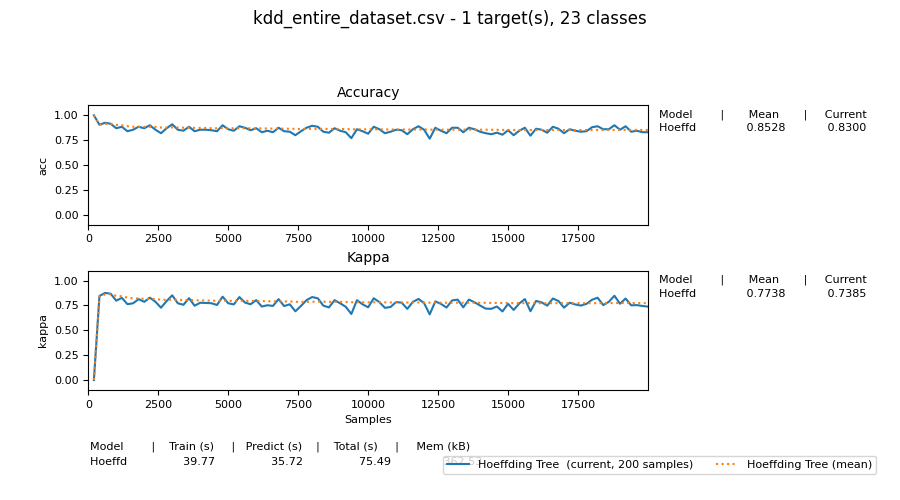

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [86.72s]
Processed samples: 20000
Mean performance:
Hoeffding Tree - Accuracy     : 0.8528
Hoeffding Tree - Kappa        : 0.7738
Hoeffding Tree - Training time (s)  : 39.77
Hoeffding Tree - Testing time  (s)  : 35.72
Hoeffding Tree - Total time    (s)  : 75.49
Hoeffding Tree - Size (kB)          : 362.5332


In [13]:
eval.evaluate(stream=stream,model=classifier,model_names=['Hoeffding Tree']);